In [1]:
%load_ext autoreload
%autoreload 2

# EDA

In [2]:
# Load necessary packages

import os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
from IPython.display import display_html, HTML
def df2html(df, style, caption):
    return df.style.set_table_attributes("style={}".format(style)).set_caption(caption)

In [28]:
DATA_PATH = "data"
train_df = pd.read_csv(os.path.join(DATA_PATH, 'trainingData.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'validationData.csv'))

In [94]:
train_df.shape

(100000, 4)

In [33]:
def get_ride_of_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    mask = (df < (Q3 + 1.5 * IQR)) & ((Q1 - 1.5 * IQR) < df)
    return mask.all(axis=1)

def about_correlation(mask, df, x, y, title):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    df.plot(x=x, y=y, kind="scatter", title=title, ax=ax[0])
    df[mask].plot(x=x, y=y, kind="scatter", title=title+" without outliers" , ax=ax[1])
    df1_styler = df2html(df.corr(), style='display:inline', caption=title)
    df2_styler = df2html(df[mask].corr(), style='display:inline', caption=title+" without outliers")
    display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)
    
def eda_1(df, x="nofGames", y="nOfPlayers", title="train_df"):
    display(HTML(df.head().to_html()))
    df = df[[x,y]]
    mask = get_ride_of_outliers(df)
    about_correlation(mask, df, x, y, title)
    return mask


In [32]:
train_mask = eda_1(train_df, x="nofGames", y="nOfPlayers", title="train_df")

,deck,nofGames,nOfPlayers,winRate
0,archers;arrows;baby-dragon;balloon;bats;fireba...,44,2,0.58511
1,archers;arrows;baby-dragon;balloon;bomber;free...,143,3,0.53767
2,archers;arrows;baby-dragon;balloon;bomber;gian...,61,3,0.34375
3,archers;arrows;baby-dragon;balloon;cannon;free...,162,1,0.49394
4,archers;arrows;baby-dragon;balloon;electro-wiz...,57,1,0.55833


<class 'pandas.core.frame.DataFrame'>


In [ ]:
train_mask = eda_1(train_df, x="nofGames", y="winRate", title="train_df")

In [ ]:
train_mask = eda_1(train_df, x="nOfPlayers", y="winRate", title="train_df")

In [ ]:
valid_mask = eda_1(valid_df, x="nofGames", y="nOfPlayers", title="validation_df")

In [ ]:
valid_mask = eda_1(valid_df, x="nofGames", y="winRate", title="validation_df")

In [ ]:
valid_mask = eda_1(valid_df, x="nOfPlayers", y="winRate", title="validation_df")

In [34]:
def about_distribution(df, mask, column):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
    df[~mask][column].hist(bins=50, ax=ax[0])
    df[mask][column].hist(bins=50, ax=ax[1])
    df[column].hist(bins=50, ax=ax[2])
    ax[0].set_title("outliers")
    ax[1].set_title("without outliers")
    ax[2].set_title("all data")
    
def eda_2(df):
    mask = get_ride_of_outliers(df[["winRate", "nofGames", "nOfPlayers"]])
    about_distribution(df, mask, "winRate")
    about_distribution(df, mask, "nofGames")
    about_distribution(df, mask, "nOfPlayers")

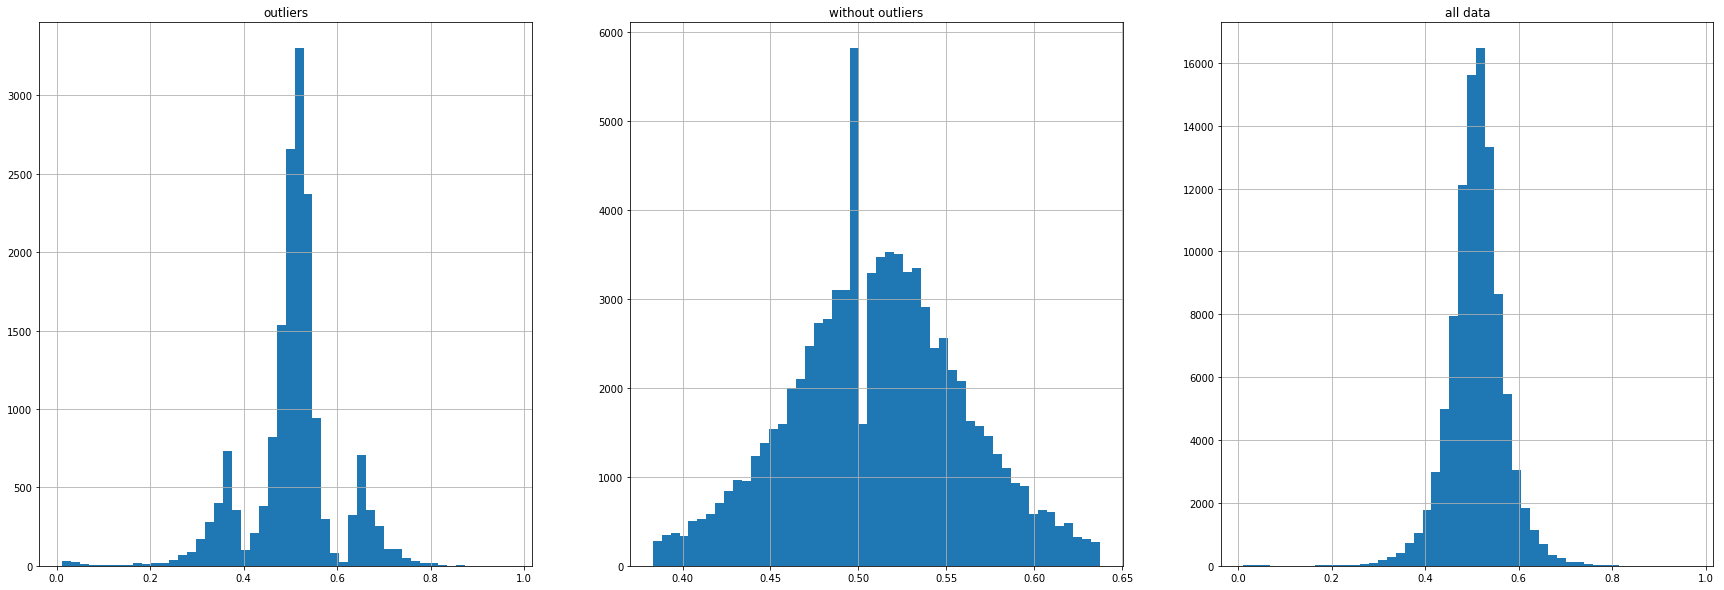

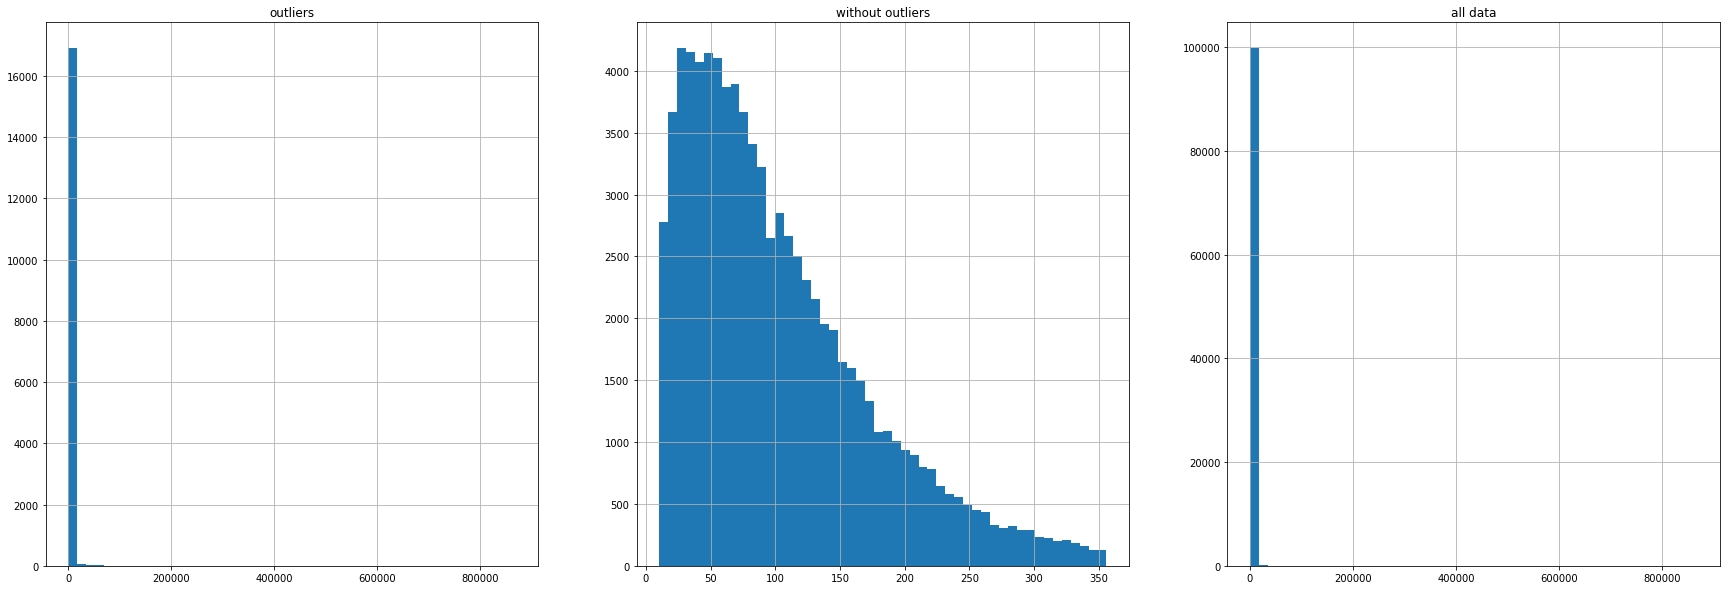

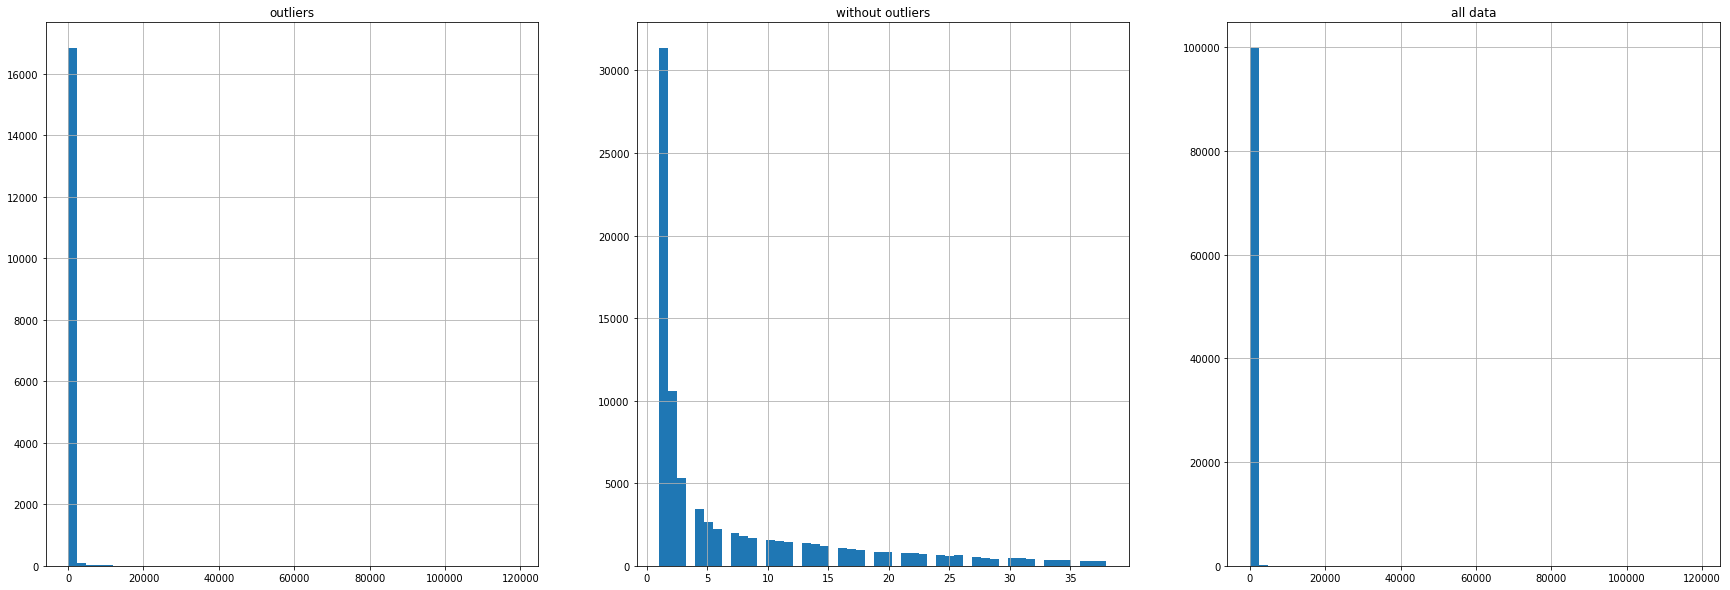

In [35]:
eda_2(train_df)

# 3. About Deck

In [38]:
from utils import get_data

In [39]:
y_cols = ["winRate"]
(x_train, y_train), (x_val, y_val) = get_data(train, valid, y_cols)

In [63]:
# czy talie się powtarzają ?
pd.DataFrame(x_train)T.duplicated().sum()

In [92]:
def dist_in_segment(data, segment):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    count_in_segment = data[segment].sum(axis=0)
    ax[0].hist(count_in_segment, bins=np.unique(count_in_segment).shape[0])
    ax[0].grid(True)
    ax[0].set_title("count distribution")
    
    argsort = count_in_segment.argsort()
    ax[1].plot(count_in_segment[argsort[::-1]])
    ax[1].grid(True)
    ax[1].set_title("counter descending")


(69,)


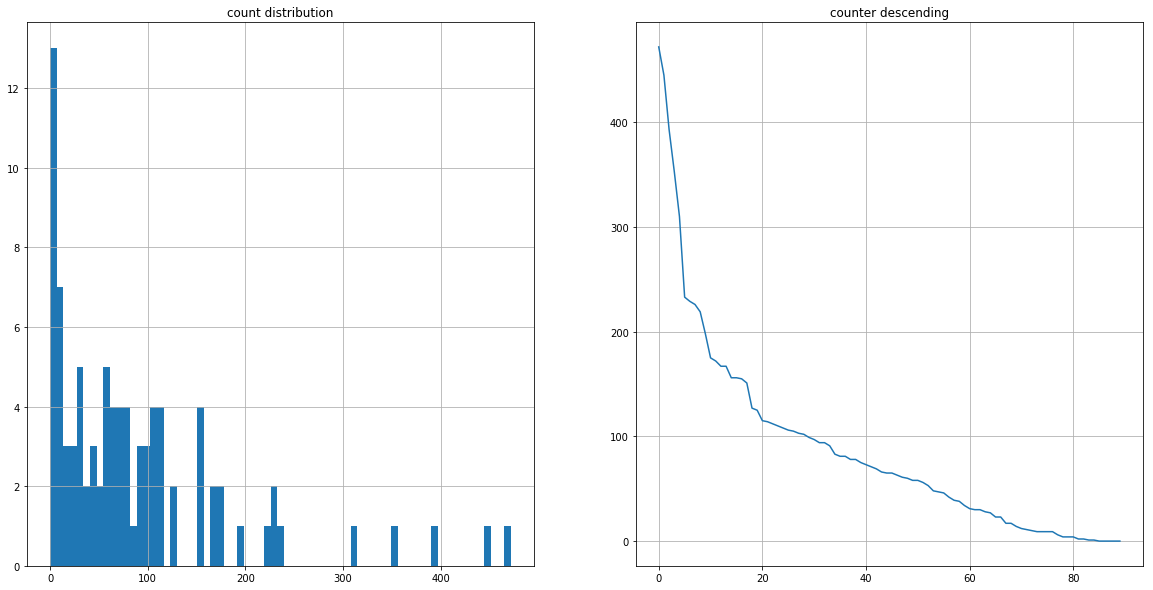

In [93]:
dist_in_segment(x_train, segment=np.arange(1000))

In [ ]:
def eda_3(mask, df, ):
    

# Coreset

In [95]:
relevant_train = train_df[train_df.nofGames > 50]
relevant_train = relevant_train[relevant_train.nOfPlayers > 2]

In [99]:
relevant_train.shape

(45748, 4)